## importing libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading model

In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

### visualizing single image on a sheet

Enter the image filename (with extension, e.g., PotatoEarlyBlight2.JPG):  PotatoEarlyBlight2.JPG


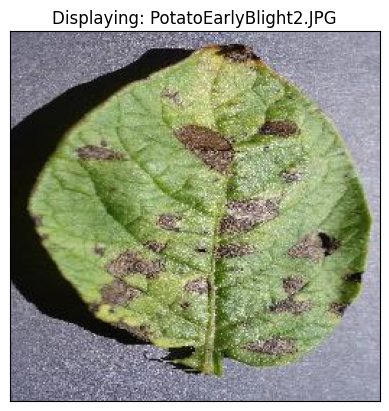

In [4]:
# pip install opencv-python-headless
!pip install opencv-python

import cv2
import os
import matplotlib.pyplot as plt

image_folder = "test/test"

image_filename = input("Enter the image filename (with extension, e.g., PotatoEarlyBlight2.JPG): ")

# Construct the full path to the image
image_path = os.path.join(image_folder, image_filename)

# Check if the file exists
if os.path.exists(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR image to RGB

    # Display the image
    plt.imshow(img)
    plt.title(f"Displaying: {image_filename}")
    plt.xticks([])  # Remove x-axis
    plt.yticks([])  # Remove y-axis
    plt.show()
else:
    print("The specified image does not exist. Please check the filename and try again.")


### Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #WE NEED IN BATCHED, IN TRAIN WE HAVE 32 BATCHES, SO WE CONVERT SINGLE IMAGE TO BATCH
print(input_arr.shape)

(1, 128, 128, 3)


In [6]:
prediction=model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


(array([[2.0472553e-14, 9.4636887e-17, 5.4008293e-18, 1.5268953e-16,
         3.6060799e-19, 7.3434109e-18, 1.5094150e-19, 3.9160734e-15,
         2.0204150e-14, 6.0489254e-16, 1.3000517e-18, 1.3813383e-20,
         2.0632586e-20, 1.3867045e-17, 3.0579895e-19, 1.9387631e-19,
         6.4130902e-15, 5.0941754e-22, 3.6525603e-17, 3.7611519e-17,
         1.0000000e+00, 9.2558968e-13, 1.4100265e-16, 4.7308538e-19,
         2.3084225e-20, 3.2648203e-15, 1.3145267e-13, 4.0423498e-18,
         1.2400306e-18, 4.7153997e-17, 6.2147967e-11, 5.0748048e-20,
         5.8910389e-14, 2.6407173e-22, 3.4304495e-18, 1.9413282e-22,
         3.4698090e-21, 6.1523887e-13]], dtype=float32),
 (1, 38))

In [7]:
result_index=np.argmax(prediction)#returns the maximum index
result_index

20

In [8]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

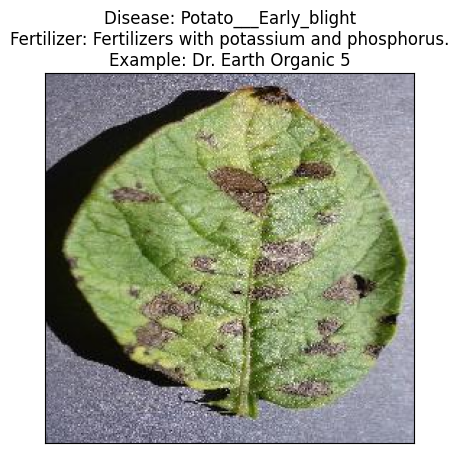

In [9]:
# Dictionary storing diseases, fertilizer recommendations, and example fertilizers
fertilizer_recommendations = {
    'Apple___Apple_scab': {
        'recommendation': 'Use balanced fertilizers with moderate nitrogen levels.',
        'example': 'Example: Miracle-Gro All Purpose Plant Food'
    },
    'Apple___Black_rot': {
        'recommendation': 'Apply balanced fertilizers with low nitrogen content.',
        'example': 'Example: Espoma Tree-Tone'
    },
    'Apple___Cedar_apple_rust': {
        'recommendation': 'Use balanced fertilizer with moderate nitrogen.',
        'example': 'Example: Jobe’s Fruit & Citrus Fertilizer'
    },
    'Apple___healthy': {
        'recommendation': 'Nitrogen-rich fertilizers in early spring for growth.',
        'example': 'Example: Scotts Turf Builder Lawn Food'
    },
    'Blueberry___healthy': {
        'recommendation': 'Fertilizers for acid-loving plants, such as ammonium sulfate.',
        'example': 'Example: Miracle-Gro Azalea, Camellia, Rhododendron Plant Food'
    },
    'Cherry_(including_sour)___Powdery_mildew': {
        'recommendation': 'Balanced fertilizers with reduced nitrogen.',
        'example': 'Example: Espoma Tree-Tone'
    },
    'Cherry_(including_sour)___healthy': {
        'recommendation': 'Balanced fertilizers for overall health.',
        'example': 'Example: Jobe’s Fruit & Citrus Fertilizer'
    },
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': {
        'recommendation': 'Balanced fertilizers with potassium.',
        'example': 'Example: Miracle-Gro Water Soluble All Purpose Plant Food'
    },
    'Corn_(maize)___Common_rust_': {
        'recommendation': 'Balanced fertilizers with potassium.',
        'example': 'Example: Pennington Ultragreen All Purpose Plant Food 10-10-10'
    },
    'Corn_(maize)___Northern_Leaf_Blight': {
        'recommendation': 'Balanced fertilizers with potassium.',
        'example': 'Example: Scotts Turf Builder Lawn Food'
    },
    'Corn_(maize)___healthy': {
        'recommendation': 'Nitrogen-rich fertilizers like 30-0-0.',
        'example': 'Example: Espoma Organic Lawn Food'
    },
    'Grape___Black_rot': {
        'recommendation': 'Use balanced fertilizers with compost for soil health.',
        'example': 'Example: Jobe’s Organic All Purpose Fertilizer'
    },
    'Grape___Esca_(Black_Measles)': {
        'recommendation': 'Balanced fertilizers with nitrogen.',
        'example': 'Example: Miracle-Gro All Purpose Plant Food'
    },
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': {
        'recommendation': 'Balanced fertilizers with compost.',
        'example': 'Example: Jobe’s Organic All Purpose Fertilizer'
    },
    'Grape___healthy': {
        'recommendation': 'Balanced fertilizers with nitrogen and potassium.',
        'example': 'Example: Jobe’s Organic Fruit & Citrus Fertilizer'
    },
    'Orange___Haunglongbing_(Citrus_greening)': {
        'recommendation': 'Micronutrient fertilizers.',
        'example': 'Example: Southern Ag Citrus Nutritional Spray'
    },
    'Peach___Bacterial_spot': {
        'recommendation': 'Moderate nitrogen fertilizers.',
        'example': 'Example: Jobe’s Organic Fruit & Citrus Fertilizer'
    },
    'Peach___healthy': {
        'recommendation': 'Balanced fertilizers with moderate nitrogen.',
        'example': 'Example: Espoma Tree-Tone'
    },
    'Pepper,_bell___Bacterial_spot': {
        'recommendation': 'Balanced fertilizers with calcium.',
        'example': 'Example: Miracle-Gro Performance Organics Edibles Plant Nutrition'
    },
    'Pepper,_bell___healthy': {
        'recommendation': 'High nitrogen fertilizers.',
        'example': 'Example: FoxFarm Grow Big Liquid Plant Food'
    },
    'Potato___Early_blight': {
        'recommendation': 'Fertilizers with potassium and phosphorus.',
        'example': 'Example: Dr. Earth Organic 5'
    },
    'Potato___Late_blight': {
        'recommendation': 'Fertilizers with potassium and phosphorus.',
        'example': 'Example: Jobe’s Organics All Purpose Fertilizer'
    },
    'Potato___healthy': {
        'recommendation': 'Balanced fertilizers with higher potassium.',
        'example': 'Example: Espoma Garden Food'
    },
    'Raspberry___healthy': {
        'recommendation': 'Balanced fertilizers with organic matter.',
        'example': 'Example: Miracle-Gro Water Soluble All Purpose Plant Food'
    },
    'Soybean___healthy': {
        'recommendation': 'Balanced fertilizers with nitrogen.',
        'example': 'Example: Pennington Ultragreen All Purpose Plant Food 10-10-10'
    },
    'Squash___Powdery_mildew': {
        'recommendation': 'Balanced fertilizers with moderate nitrogen.',
        'example': 'Example: Miracle-Gro Water Soluble All Purpose Plant Food'
    },
    'Strawberry___Leaf_scorch': {
        'recommendation': 'Balanced fertilizers.',
        'example': 'Example: Espoma Organic Strawberry Food'
    },
    'Strawberry___healthy': {
        'recommendation': 'Fertilizers with higher potassium.',
        'example': 'Example: Dr. Earth Fruit & Vegetable Fertilizer'
    },
    'Tomato___Bacterial_spot': {
        'recommendation': 'Balanced fertilizers with low nitrogen.',
        'example': 'Example: Jobe’s Organics Tomato Fertilizer'
    },
    'Tomato___Early_blight': {
        'recommendation': 'Balanced fertilizers with low nitrogen.',
        'example': 'Example: Miracle-Gro Tomato Plant Food'
    },
    'Tomato___Late_blight': {
        'recommendation': 'Balanced fertilizers with low nitrogen.',
        'example': 'Example: FoxFarm Big Bloom'
    },
    'Tomato___Leaf_Mold': {
        'recommendation': 'Balanced fertilizers.',
        'example': 'Example: Espoma Organic Tomato-tone'
    },
    'Tomato___Septoria_leaf_spot': {
        'recommendation': 'Balanced fertilizers.',
        'example': 'Example: Miracle-Gro Water Soluble Tomato Food'
    },
    'Tomato___Spider_mites Two-spotted_spider_mite': {
        'recommendation': 'Balanced fertilizers.',
        'example': 'Example: Jobe’s Organics'
    },
    'Tomato___Target_Spot': {
        'recommendation': 'Balanced fertilizers.',
        'example': 'Example: Espoma Organic Tomato-tone'
    },
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': {
        'recommendation': 'Balanced fertilizers with potassium.',
        'example': 'Example: FoxFarm Grow Big Liquid Fertilizer'
    },
    'Tomato___Tomato_mosaic_virus': {
        'recommendation': 'Balanced fertilizers with potassium and phosphorus.',
        'example': 'Example: Jobe’s Organic Tomato Fertilizer'
    },
    'Tomato___healthy': {
        'recommendation': 'Slow-release balanced fertilizers.',
        'example': 'Example: Osmocote Smart-Release Plant Food'
    }
}

# Display the result of disease prediction
model_prediction = class_name[result_index]
fertilizer_info = fertilizer_recommendations.get(model_prediction, {"recommendation": "No recommendation available", "example": ""})

# Display the disease, fertilizer recommendation, and example
#print(f"Disease: {model_prediction}")
#print(f"Recommended Fertilizer: {fertilizer_info['recommendation']}")
#print(f"{fertilizer_info['example']}")

# Show the image and title with disease, fertilizer recommendation, and example
plt.imshow(img)
plt.title(f"Disease: {model_prediction}\nFertilizer: {fertilizer_info['recommendation']}\n{fertilizer_info['example']}")
plt.xticks([])  # remove x-axis
plt.yticks([])  # remove y-axis
plt.show()
